## Read and view data

In [5]:
from pathlib import Path
import pandas as pd
import numpy as np

In [6]:

from google.colab import files

uploaded = files.upload()
ls= list()
for fn in uploaded.keys():
  print('Uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
    # Read the uploaded file into a pandas dataframe
  df = pd.read_csv(fn)
  ls.append(df)

Saving X_test.csv to X_test.csv
Saving X_train.csv to X_train.csv
Saving y_test.csv to y_test.csv
Saving y_train.csv to y_train.csv
Uploaded file "X_test.csv" with length 252629 bytes
Uploaded file "X_train.csv" with length 1009476 bytes
Uploaded file "y_test.csv" with length 40593 bytes
Uploaded file "y_train.csv" with length 162251 bytes


In [7]:
import pandas as pd
# Read the uploaded file into a pandas dataframe
X_train = ls[1]
X_test = ls[0]
y_train = ls[3]
y_test = ls[2]



In [6]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.88,38.00,22.0,721.0,117.0,367.0,129.0,5.3098,INLAND
1,-117.82,33.85,18.0,1810.0,305.0,1189.0,326.0,5.2227,<1H OCEAN
2,-118.31,34.09,34.0,2065.0,839.0,2626.0,775.0,1.8214,<1H OCEAN
3,-120.76,38.60,14.0,2925.0,625.0,1226.0,437.0,2.5865,INLAND
4,-118.09,33.92,36.0,847.0,185.0,713.0,194.0,4.8542,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
16507,-118.21,34.13,52.0,2465.0,611.0,1433.0,570.0,3.2500,<1H OCEAN
16508,-122.88,38.34,20.0,3404.0,628.0,1641.0,585.0,5.0574,<1H OCEAN
16509,-118.03,33.90,36.0,1143.0,193.0,826.0,188.0,5.3184,<1H OCEAN
16510,-118.36,34.09,36.0,1390.0,458.0,874.0,468.0,2.5812,<1H OCEAN


In [7]:
# Quick view of data
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.88,38.00,22.0,721.0,117.0,367.0,129.0,5.3098,INLAND
1,-117.82,33.85,18.0,1810.0,305.0,1189.0,326.0,5.2227,<1H OCEAN
2,-118.31,34.09,34.0,2065.0,839.0,2626.0,775.0,1.8214,<1H OCEAN
3,-120.76,38.60,14.0,2925.0,625.0,1226.0,437.0,2.5865,INLAND
4,-118.09,33.92,36.0,847.0,185.0,713.0,194.0,4.8542,<1H OCEAN


In [8]:
y_train.head()

,median_house_value
0,151900.0
1,213500.0
2,211100.0
3,133800.0
4,167400.0


In [9]:
# View data types
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.1+ MB


In [8]:
X_train['ocean_proximity'] = X_train['ocean_proximity'].astype('category')


In [11]:
# Summary stats
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16346.000000,16512.000000,16512.000000,16512.000000
mean,-119.560789,35.624789,28.673147,2630.357498,537.120763,1421.712512,499.065589,3.873663
std,2.003878,2.136925,12.587974,2144.525333,420.377725,1102.909159,380.791334,1.904979
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.780000,33.930000,18.000000,1446.750000,295.000000,784.000000,279.000000,2.562500
50%,-118.490000,34.250000,29.000000,2129.000000,435.000000,1165.000000,409.000000,3.531300
75%,-118.010000,37.710000,37.000000,3153.000000,646.000000,1723.250000,604.000000,4.750000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100


In [12]:
# unique values of object data type
X_train["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     7309
INLAND        5241
NEAR OCEAN    2126
NEAR BAY      1832
ISLAND           4
Name: count, dtype: int64

In [13]:
# Missing values
X_train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        166
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [14]:
# Missing values
X_test.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        41
population             0
households             0
median_income          0
ocean_proximity        0
dtype: int64

# Visualize Data Distributions

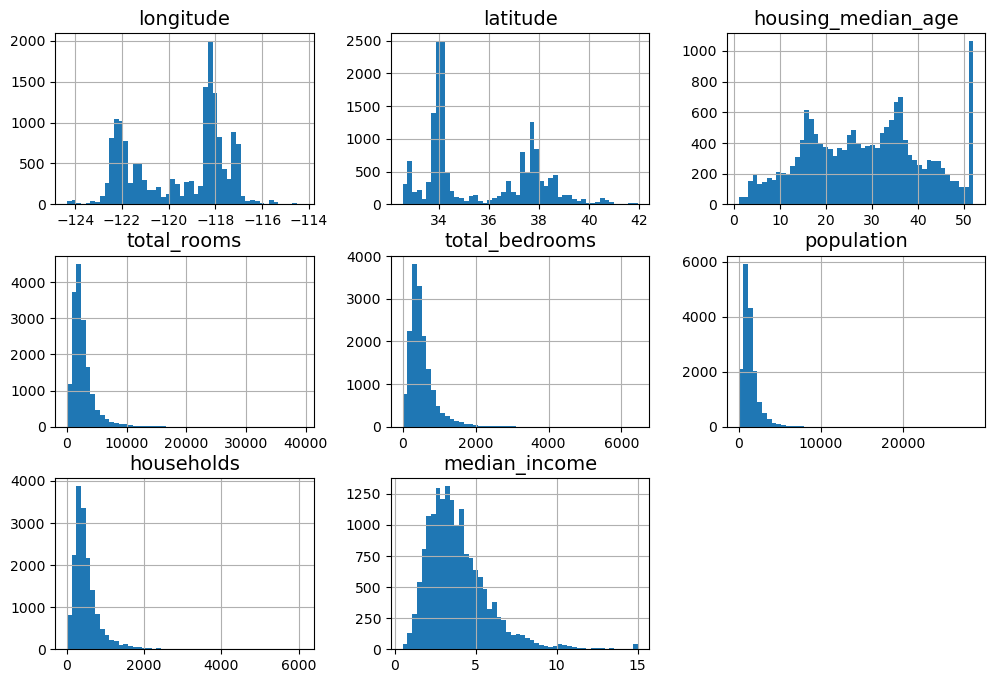

In [ ]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

X_train.hist(bins=50, figsize=(12, 8))

plt.show()

## Data Preprocessing
### Categorical/Ordinal Data

In [27]:
X_train["ocean_proximity"].unique()

['INLAND', '<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND']
Categories (5, object): ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [9]:
# Concatenate column-wise
train_df = pd.concat([X_train, y_train], axis=1)

In [ ]:
train_df.groupby('ocean_proximity').mean(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.835584,34.549022,29.316186,2618.527295,544.401882,1512.403475,516.481872,4.248060,241038.793542
INLAND,-119.718932,36.722255,24.398588,2715.489601,534.039053,1391.720282,477.156077,3.205364,124405.822744
ISLAND,-118.362500,33.365000,40.000000,1436.500000,397.500000,651.750000,273.750000,2.582875,400550.000000
NEAR BAY,-122.263412,37.805404,37.567686,2510.036026,517.177313,1232.632642,491.725437,4.192885,261329.234170
NEAR OCEAN,-119.337498,34.742902,29.314205,2567.090310,537.206946,1348.242709,499.950141,3.961355,249852.150047


### Catagorical/Ordinal Encoding Options
* Option 1 Categorical Transformation for ocean_proximity
* Option 2 Ordinal Transformation
* Option 3 Target Encoding

### Numerical Data Preprocessing

Variables
* housing median age
* total rooms
* total bedrooms
* population
* households
* median income
* median house value

Transformations
* log transformation: total_rooms, total_bedrooms, population, households,  median_income
(total bedrooms need simple imputer before transformation since it has missing values)
* Quantile transformation: housing_median_age






#Pipelines and Transformers

## Initializing pipelines

In [10]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [11]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer, OneHotEncoder,  QuantileTransformer, FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

In [14]:
spac_attribs = ["longitude", "latitude"]
quant_attribs = ["housing_median_age"]
log_attribs = ["total_rooms", "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

log_pipeline = Pipeline([("impute", KNNImputer(n_neighbors=3)), ("log transform", PowerTransformer(method = 'box-cox'))])
cat_pipeline = Pipeline([("categorical transform", OneHotEncoder(handle_unknown="ignore"))])
quantile_pipeline = Pipeline([("quantile transformer", QuantileTransformer(n_quantiles=100))])
quantile_pipeline = Pipeline([("quantile transformer", QuantileTransformer(n_quantiles=100)),
                               ("standard scaling", StandardScaler())])


In [15]:
preprocessings = [
    ColumnTransformer([
        ("spatial", "passthrough", spac_attribs),
        ("quant", quantile_pipeline, quant_attribs),
        ("logdist", log_pipeline, log_attribs),
        ("categorical", cat_pipeline, cat_attribs),
    ]),

    ColumnTransformer([
        ("spatial", "passthrough", spac_attribs),
        ("quant", "passthrough", quant_attribs),
        ("logdist", log_pipeline, log_attribs),
        ("categorical", cat_pipeline, cat_attribs),
    ])
]

In [16]:

# Define the mapping
mapping = {'NEAR BAY': 1, '<1H OCEAN': 2, 'INLAND': 3, 'NEAR OCEAN': 4, 'ISLAND': 5}

# Define the transformation function
def map_values(X):
    return X.replace(mapping)

# list of categorical transformations
cat_pipelines = [
    ("one_hot", Pipeline([("onehot transform", OneHotEncoder(handle_unknown="ignore"))])),
    ("target_enc", Pipeline([("target encoding", TargetEncoder(cols=['ocean_proximity'])),
                            ("standard scaling", StandardScaler())])),
    ("drop", "drop"),
    ("ordinal", Pipeline([("target encoding", FunctionTransformer(map_values, validate=False)),
                         ("standard scaling", StandardScaler())]))
]


log_pipelines=  [[
    ("log", Pipeline([("SimpleImputation", SimpleImputer(missing_values=np.nan, strategy='mean')), ("log transform", PowerTransformer(method = 'box-cox'))])),
    ("drop", "drop"),
    ("quant",Pipeline([("SimpleImputation", SimpleImputer(missing_values=np.nan, strategy='mean')), ("quantile transformer", QuantileTransformer(n_quantiles=100))])),
    ("poly1", Pipeline([("SimpleImputation", SimpleImputer(missing_values=np.nan, strategy='mean')), ("polynomial1", PolynomialFeatures(degree=7)),])),
    ("poly2", Pipeline([("SimpleImputation", SimpleImputer(missing_values=np.nan, strategy='mean')), ("polynomial2", PolynomialFeatures(degree=7, interaction_only=True))]))
],


[
    ("log", Pipeline([("KNN-imputation", KNNImputer(n_neighbors=3)), ("log transform", PowerTransformer(method = 'box-cox'))])),
    ("drop", "drop"),
    ("quant",Pipeline([("KNN-imputation", KNNImputer(n_neighbors=3)), ("quantile transformer", QuantileTransformer(n_quantiles=100))])),
    ("poly1", Pipeline([("KNN-imputation", KNNImputer(n_neighbors=3)), ("polynomial1", PolynomialFeatures(degree=7))])),
    ("poly2", Pipeline([("KNN-imputation", KNNImputer(n_neighbors=3)), ("polynomial2", PolynomialFeatures(degree=7, interaction_only=True))]))
],

[
    ("log", Pipeline([("SimpleImputation", SimpleImputer(missing_values=np.nan, strategy='mean')), ("log transform", PowerTransformer(method = 'box-cox'))])),
    ("drop", "drop"),
    ("quant",Pipeline([("SimpleImputation", SimpleImputer(missing_values=np.nan, strategy='mean')), ("quantile transformer", QuantileTransformer(n_quantiles=100)),
                      ("standard scaling", StandardScaler())])),
    ("poly1", Pipeline([("SimpleImputation", SimpleImputer(missing_values=np.nan, strategy='mean')), ("polynomial1", PolynomialFeatures(degree=7)),
                       ("standard scaling", StandardScaler())])),
    ("poly2", Pipeline([("SimpleImputation", SimpleImputer(missing_values=np.nan, strategy='mean')), ("polynomial2", PolynomialFeatures(degree=7, interaction_only=True)),
                       ("standard scaling", StandardScaler())])),
],


[
    ("log", Pipeline([("KNN-imputation", KNNImputer(n_neighbors=3)), ("log transform", PowerTransformer(method = 'box-cox'))])),
    ("drop", "drop"),
    ("quant",Pipeline([("KNN-imputation", KNNImputer(n_neighbors=3)), ("quantile transformer", QuantileTransformer(n_quantiles=100)),
                      ("standard scaling", StandardScaler())])),
    ("poly1", Pipeline([("KNN-imputation", KNNImputer(n_neighbors=3)), ("polynomial1", PolynomialFeatures(degree=7)),
                       ("standard scaling", StandardScaler())])),
    ("poly2", Pipeline([("KNN-imputation", KNNImputer(n_neighbors=3)), ("polynomial2", PolynomialFeatures(degree=7, interaction_only=True)),
                       ("standard scaling", StandardScaler())])),
]]




#log_pipes = [log_pipelines1, log_pipelines]

We see that preprocessor 2 shows the min error,however, we will use both and evaluate errors when using estimators.

## No transformation

In [17]:
#Evaluating model pipeline with Linear regression
def evaluate_model(model_pipeline, X, y):
    from sklearn.metrics import mean_absolute_error
    y_pred = model_pipeline.predict(X)
    model_mae = mean_absolute_error(y, y_pred)
    return(model_mae)


In [66]:
print("No transformation:")
results = []
log_pipelines_0transf =[
    ("SimpleImputation", Pipeline([("impute1", SimpleImputer(missing_values=np.nan, strategy='mean'))])),
    ("KNN-imputation", Pipeline([("impute3", KNNImputer(n_neighbors=6))])),
]

for name, log_pipeline in log_pipelines_0transf:
    preprocessor = ColumnTransformer([
    ("log", log_pipeline, log_attribs),
    ])

    model_pipe = make_pipeline(preprocessor, LinearRegression())
    model_pipe.fit(X_train, y_train)

    model_mae = evaluate_model(model_pipe, X_test, y_test)  #calling fn to evaluate the model
    print(name, model_mae)
    results.append((name, model_mae))

No transformation:
SimpleImputation 56880.30088913318
KNN-imputation 56811.081098571594


## Single transformation

In [67]:
i=1
results = []
for preprocessor in preprocessings:
    print("preprocessor: ", i)
    i=i+1
    for name, cat_pipeline in cat_pipelines:

        model_pipe = make_pipeline(
            preprocessor, LinearRegression()
        )

        model_pipe.fit(X_train, y_train)
        #y_pred = model_pipe.predict(X_test)
        model_mae = evaluate_model(model_pipe, X_train, y_train)

        #model_mae = mean_absolute_error(y_test, y_pred)
        print(name, model_mae)
    print('\n')


preprocessor:  1
one_hot 53421.39836536153
target_enc 53421.82739713868
drop 53423.9550902544
ordinal 53423.10247311344


preprocessor:  2
one_hot 53352.421665221606
target_enc 53352.421665221606
drop 53352.421665221606
ordinal 53352.421665221606




##Single and two transformations

In [68]:
i=0
j=0
min_mae_list = []
names = ['Simple', 'KNN']
def single_transformation(preprocessor, log_pipeline):
    logs = []
    cats = []
    mae_list =[]
    impute_list = []
    results = []
    #print("Imputation: ", names[i], '\n')

    for name1, cat_pipeline in cat_pipelines:
        for name2, log_pipe in log_pipeline:

            model_pipe = make_pipeline(
                preprocessor, LinearRegression()
            )

            model_pipe.fit(X_train, y_train)
            y_pred = model_pipe.predict(X_test)
            model_mae = mean_absolute_error(y_test, y_pred)

            logs.append(name2)
            cats.append(name1)
            mae_list.append(model_mae)
            impute_list.append(names[i])
           # preprocess.append()
    df = pd.DataFrame({'logs': logs, 'cats': cats, 'mae':mae_list, 'impute': impute_list})
    #print(df, '\n')
    min_mae= min(df['mae'])
    #print('minimum mae: ', min_mae, '\n')
    min_mae_list.append(min_mae)
    log = df.loc[df['mae'] == min_mae, 'logs']
    cat = df.loc[df['mae'] == min_mae, 'cats']
    imp = df.loc[df['mae'] == min_mae, 'impute']

    new_df = pd.DataFrame({'final_logs': log, 'final_cats': cat, 'min_mae':min_mae, 'imputation': imp})
    return new_df.head(1)

In [69]:
final_df = pd.Series()
def one_two_transf(log_pipeline):
    i=0
    df1 = pd.Series()
    for preprocessor in preprocessings:
        #print("Preprocessor: ", i)
        new_df = single_transformation(preprocessor, log_pipeline)
        new_df['preprocessor'] = int(i)
        df1 = pd.concat([df1, new_df], ignore_index=True)
       # df1 = pd.concat([df1, new_df], axis=0)
        i = i+1
    #df1 = df1.iloc[:, 1:]
    return(df1)



In [70]:
for log_pipeline in log_pipelines:
    df2 = one_two_transf(log_pipeline)
    final_df = pd.concat([df2, final_df], ignore_index=True)



In [71]:
final_df.loc[:3, 'Transformation'] = 'Single '
final_df.loc[4:, 'Transformation'] = 'Two '
print(final_df.iloc[:, 1:])


  final_logs final_cats       min_mae imputation  preprocessor Transformation
0      poly1       drop  52588.792890     Simple           0.0        Single 
1        log    one_hot  52553.379119     Simple           1.0        Single 
2      poly2    ordinal  52588.306573     Simple           0.0        Single 
3        log    one_hot  52553.379119     Simple           1.0        Single 
4      poly2    one_hot  52589.613531     Simple           0.0           Two 
5        log    one_hot  52553.379119     Simple           1.0           Two 
6      poly2    one_hot  52586.875305     Simple           0.0           Two 
7        log    one_hot  52553.379119     Simple           1.0           Two 


Simple imputation-
Preprocessor 2 has the lowest error


Preprocessor 1:
    With simple imputation, lowest errors appear for
    1. ordinal (for categorical variable) and log (for log variables)
    MAE: 52590.29694757765
    2. one_hot (for categorical variable) and drop (for log variables)
    MAE: 52590.34873907616

Preprocessor 2:
    All the pipelines show the same error. Therefore, we may use ordinal(for categorical variable) and log (for log variables)
    




Conclusion: We may use preprocessor 2, with ordinal (for categorical variable) and log (for log variables)

KNN-(Ther results aren't shown here)
Preprocessor 2 has the lowest error


Preprocessor 1:  
    1. target_enc (for categorical variable) and poly2 (for log variables)
    MAE: 52588.2974705368

Preprocessor 2:
    All the pipelines show the same error. Therefore, we may use target_enc(for categorical variable) and poly2(for log variables)



Conclusion: We may use preprocessor 2, with target_enc(for categorical variable) and log(for log variables)

Final Conclusion:


    Preprocessor: Although, preprocessor 2 shows the min error, we are yet to evaluate this with estimators as well,
    Imputer: Simple imputation (for log variables)
    Transformer: one-hot encoding or target_enc(for categorical variable) and log(for log variables)

In [72]:

log_pipeline = Pipeline([("impute", KNNImputer(n_neighbors=3)), ("log transform", PowerTransformer(method = 'box-cox'))])
cat_pipeline = Pipeline([("categorical transform", OneHotEncoder(handle_unknown="ignore"))])
quantile_pipeline = Pipeline([("quantile transformer", QuantileTransformer(n_quantiles=100)),
                               ("standard scaling", StandardScaler())])


# Training regressors, voting and stacking with 2 preprocessors

###Regressors

In [18]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.0 MB/s eta 0:00:00


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [20]:
#Defining regressors

regressors=[
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    ExtraTreesRegressor(random_state=42),
    LGBMRegressor(objective='regression', metric='mae', verbosity=-1, random_state=42),
    RandomForestRegressor(random_state=42),
    CatBoostRegressor(verbose=False, random_state=42),
    XGBRegressor(random_state=42),
    HistGradientBoostingRegressor(random_state=42),
    KNeighborsRegressor()
]

In [21]:
#Defining a function to fit each regressor
def fitting_regressors(i,preprocessor):
    #for name, log_pipeline in log_pipelines1:
    results = []

    model_pipe = make_pipeline(preprocessor, regressors[i])
    model_pipe.fit(X_train, y_train)

    model_mae = evaluate_model(model_pipe, X_test, y_test)  #calling fn to evaluate the model
    print(type(regressors[i]).__name__,":",model_mae)
    results.append( model_mae)
    return model_mae

### Voting and Stacking

In [22]:
from sklearn.ensemble import VotingRegressor, StackingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Fn for voting regressor and accuracy
def voting_regressor(pr):
  et = make_pipeline(pr, regressors[3])
  lgbm = make_pipeline(pr, regressors[4])
  rf = make_pipeline(pr, regressors[5])
  ct = make_pipeline(pr, regressors[6])
  xgb = make_pipeline(pr, regressors[7])
  hgb = make_pipeline(pr, regressors[8])

  vclf1 = VotingRegressor(estimators=[
  ('rf', rf), ('ct', ct), ('xgb', xgb)],verbose=False)
  vclf1 = vclf1.fit(X_train, y_train)
  accuracy_vclf1 = vclf1.score(X_test, y_test)
  return accuracy_vclf1, vclf1


In [24]:
# #Fn for stacking regressor and accuracy
def stacking_regressor(pr):
  et = make_pipeline(pr, regressors[3])
  lgbm = make_pipeline(pr, regressors[4])
  rf = make_pipeline(pr, regressors[5])
  ct = make_pipeline(pr, regressors[6])
  xgb = make_pipeline(pr, regressors[7])
  hgb = make_pipeline(pr, regressors[8])

  sclf1 = StackingRegressor(estimators=[ ('rf', rf),
  ('ct', ct), ('xgb', xgb)])
  sclf1 = sclf1.fit(X_train, y_train)
  accuracy_sclf1 = sclf1.score(X_test, y_test)
  return accuracy_sclf1, sclf1

In [101]:
## Combinations of pipelines(log and categorical)
print(final_df.iloc[:, 1:])
print('\n\n')


## Pipelines and Regressors - 2 Preprocessors

#Looping for each preprocessor
for p in range(0,2):
    print("          Preprocessor ", p)
    regressor_mae_list = []
    regressors_names_list = []

  #Looping for each regressor
    for r in range(0,10):
        mae= fitting_regressors(r, preprocessings[p])     #calling pipelines_regressors fn
        regressors_names_list.append(type(regressors[r]).__name__)
        regressor_mae_list.append(mae)
    mae_df = pd.DataFrame({'regressor': regressors_names_list, 'mae': regressor_mae_list})
    #print('\n', mae_df)
    print("\n\n")


## Voting and Stacking

#With regressors with the least error
i=0
ls1 = ['voting', 'stacking']

preprocess_name = []
voting_stacking_accuracy_list = []
regressor_name= []

#Looping for each preprocessor for voting and stacking regressor accuracy
for pr in preprocessings:
  accuracy1 = voting_regressor(pr)[0]
  voting_stacking_accuracy_list.append(accuracy1)
  regressor_name.append(ls1[0])

  accuracy2 = stacking_regressor(pr)[0]
  voting_stacking_accuracy_list.append(accuracy2)
  regressor_name.append(ls1[1])
  preprocess_name += [i, i]

  i= i+1

accuracy_df = pd.DataFrame({ 'Regressor': regressor_name, 'preprocessor': preprocess_name, 'accuracy': voting_stacking_accuracy_list})

accuracy_df

  final_logs final_cats       min_mae imputation  preprocessor Transformation
0      poly1       drop  52588.792890     Simple           0.0        Single 
1        log    one_hot  52553.379119     Simple           1.0        Single 
2      poly2    ordinal  52588.306573     Simple           0.0        Single 
3        log    one_hot  52553.379119     Simple           1.0        Single 
4      poly2    one_hot  52589.613531     Simple           0.0           Two 
5        log    one_hot  52553.379119     Simple           1.0           Two 
6      poly2    one_hot  52586.875305     Simple           0.0           Two 
7        log    one_hot  52553.379119     Simple           1.0           Two 



          Preprocessor  0
LinearRegression : 52592.08151446642
DecisionTreeRegressor : 41202.33502906977
GradientBoostingRegressor : 37764.30409533487
ExtraTreesRegressor : 33236.0537621124
LGBMRegressor : 31640.503988610926
RandomForestRegressor : 30577.732754360466
CatBoostRegressor : 30017.5

,Regressor,preprocessor,accuracy
0,voting,0,0.842878
1,stacking,0,0.842923
2,voting,1,0.842858
3,stacking,1,0.842650


## Explanation- Preprocessors, Regressors, Voting and Stacking


**Preprocessors and Pipelines **

Simple imputation- Preprocessor 2 has the lowest error


*   Preprocessor 1: With simple imputation, lowest errors appear for 1. ordinal (for categorical variable) and log (for log variables) MAE: 52590.29694757765 2. one_hot (for categorical variable) and drop (for log variables) MAE: 52590.34873907616
*   Preprocessor 2: All the pipelines show the same error. Therefore, we may use ordinal(for categorical variable) and log (for log variables)








Conclusion: We may use preprocessor 2, with ordinal (for categorical variable) and log (for log variables). However, we may have to determine which preprocessor to use from pipelines with estimators.


**Regressors with 2 preprocessors**

Preprocessor  1: Regressors with least error are:
*   RandomForestRegressor  30578.554358
*   CatBoostRegressor  30017.501214
*   XGBRegressor : 30629.48170553991
*   LGBMRegressor : 31640.503988610926









Preprocessor  2: Regressors with least error are:
*    RandomForestRegressor  30590.342817
*    CatBoostRegressor  30017.501214
*   XGBRegressor : 30629.48170553991
*   LGBMRegressor : 31640.503988610926







Conclusion:
*   Estimator- CatBoostRegressor or RandomforestRegressor
*  Transformation- two transformations for all attributes
*  Preprocessor 1
*  Imputation- Simple-imputation for missing values

**Voting and Stacking with 2 preprocessors**

Conclusion: Stacking with preprocessor 1. Regressors used: RandomForestRegressor,  CatBoostRegressor, XGBRegressor



From a business perspective, we will have to use- Stacking with preprocessor 1 with RandomForestRegressor, CatBoostRegressor, XGBRegressor as Regressors for stacking for better accuracy.